# Import the neccessary Libraries

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from scipy.stats import probplot, shapiro

In [3]:
# Import the dataset
df =  pd.read_csv("/Users/abhishekgoudar/code/final_project/archive/train.csv")
pd.set_option('display.max_columns', None)
df.head(5)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Descriptive Analysis

In [4]:
df.shape

(103904, 25)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [6]:
df['Age'].value_counts()[7]

562

In [7]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# Data Pre-Processing

In [8]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'id'], axis=1)

df.fillna(df.mean(), inplace=True)

In [8]:

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [9]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mode()[0],inplace=True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
num_col=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
cat_col=[x for x in df.columns if x not in num_col]

# converting all ordinal features to categorical features
df[cat_col]=df[cat_col].astype("category")

#verifying the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

# Explonatory Data Analysis

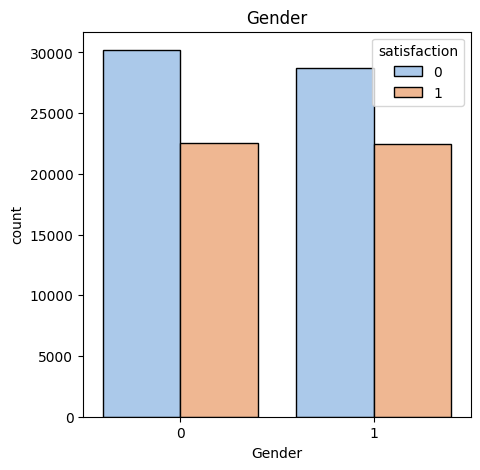

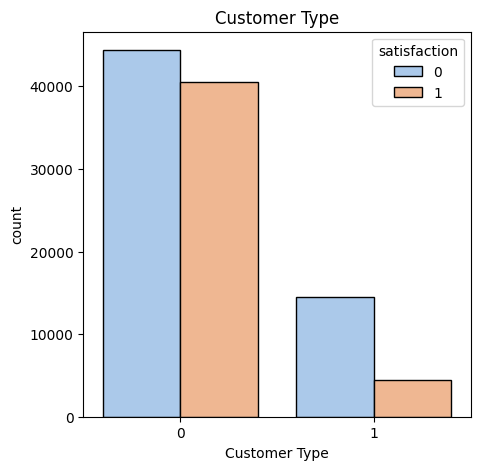

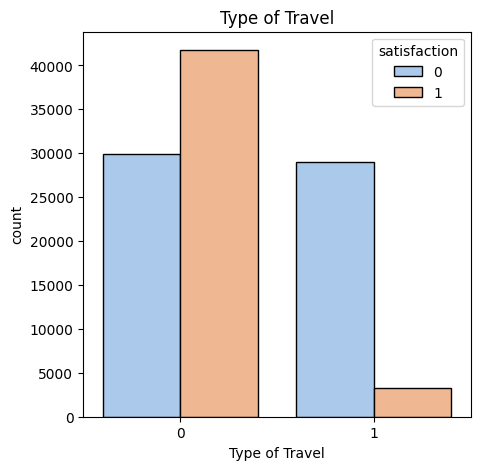

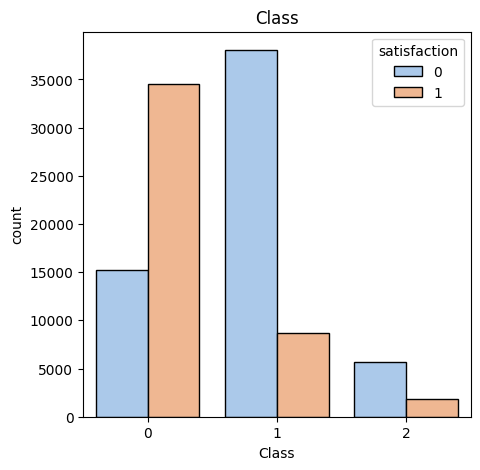

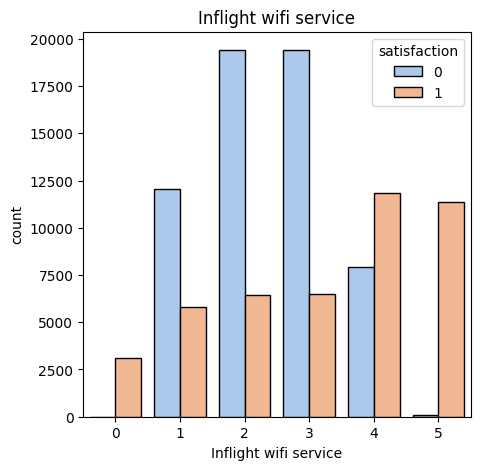

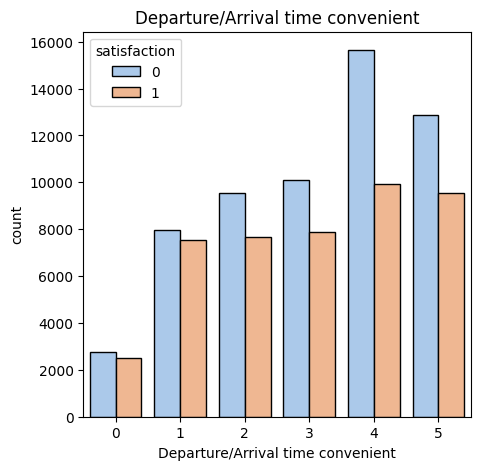

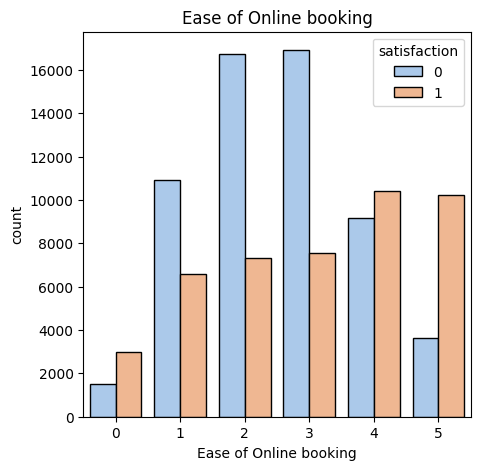

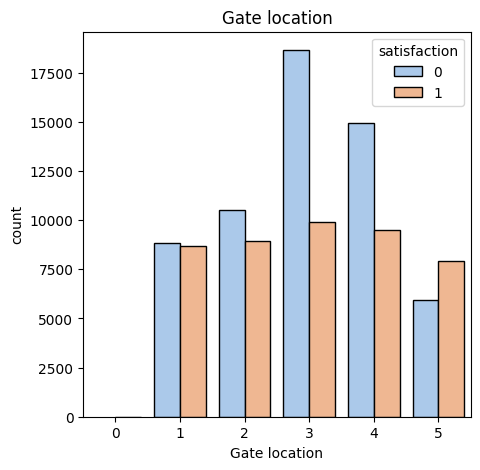

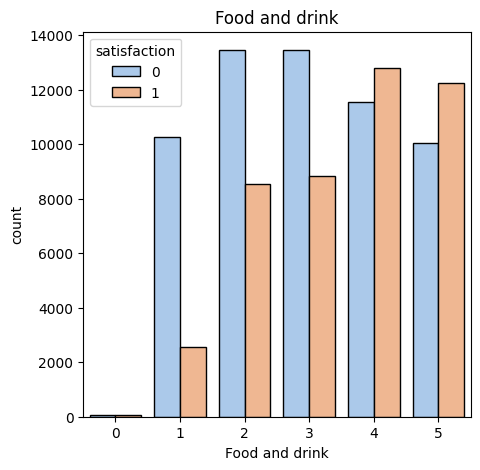

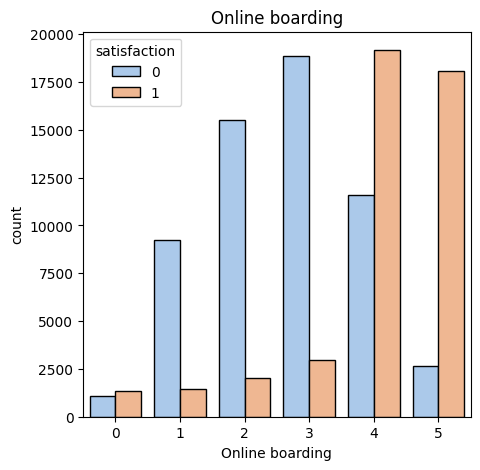

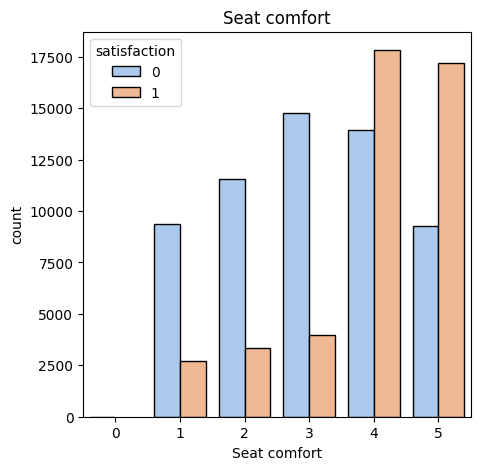

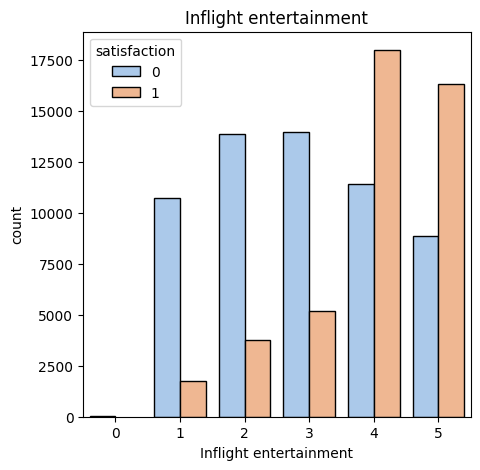

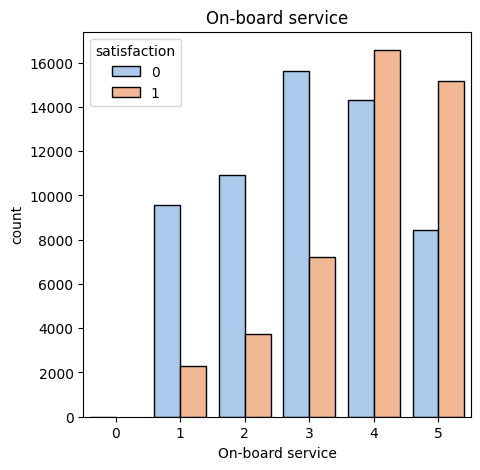

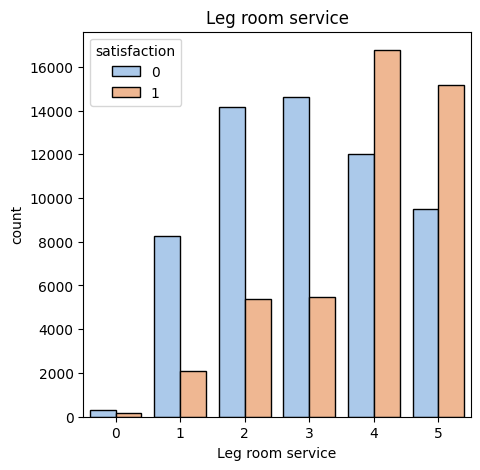

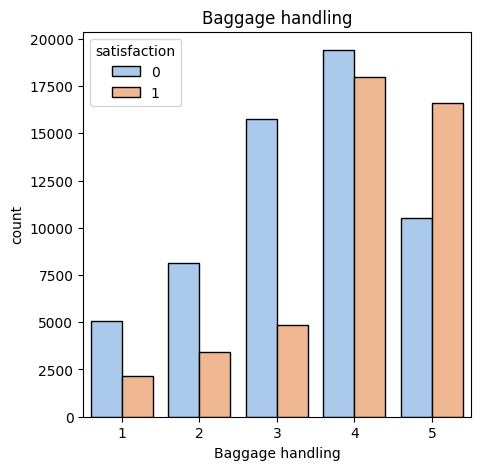

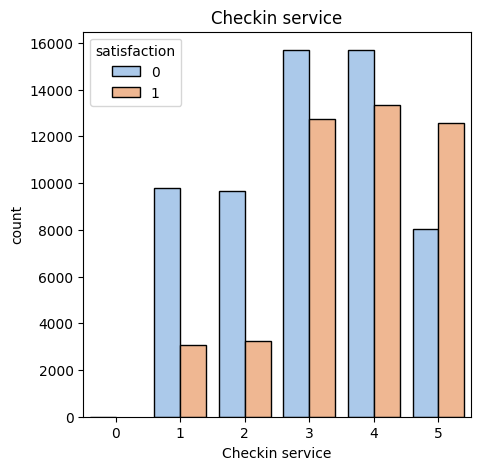

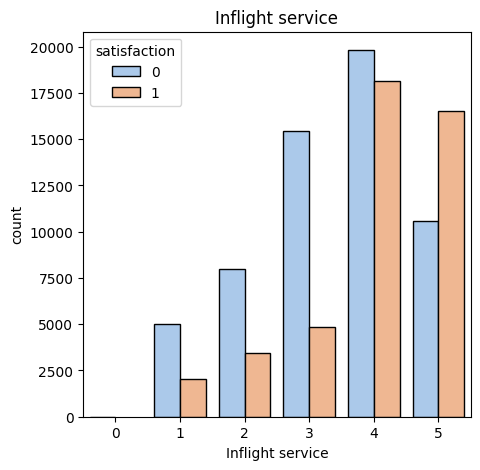

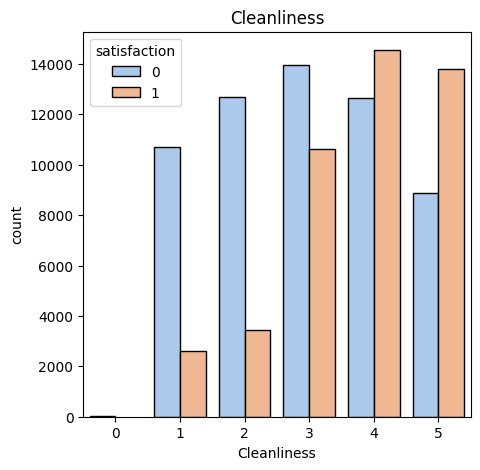

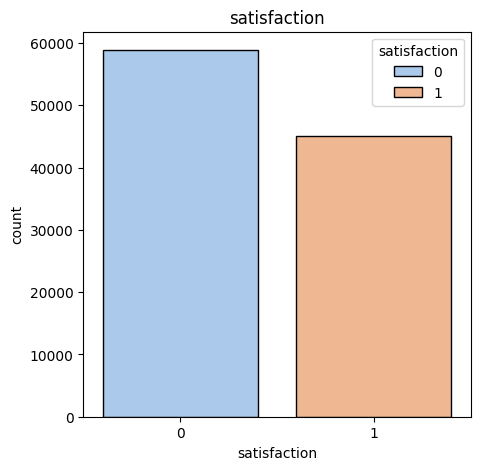

In [11]:
# Perform EDA on the pre procesed data
for i in cat_col:
    plt.figure(figsize=(5,5))
    sns.countplot(x=i, data=df[cat_col], hue="satisfaction",palette="pastel",edgecolor = "black")
    plt.title(i)

#### Cat plot to understand the distribution


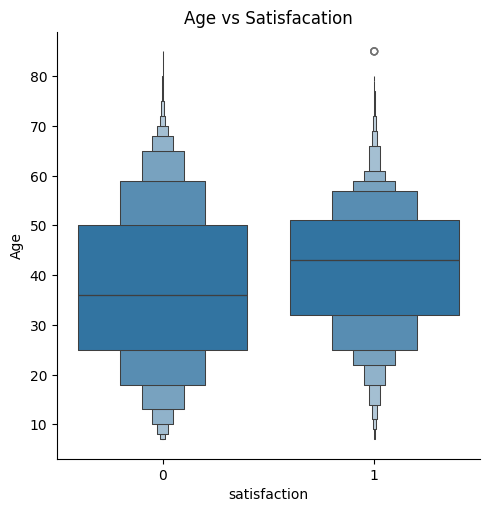

In [12]:
sns.catplot(x="satisfaction", y="Age", kind="boxen",
            data=df.sort_values("satisfaction")
            ).set(title ="Age vs Satisfacation");

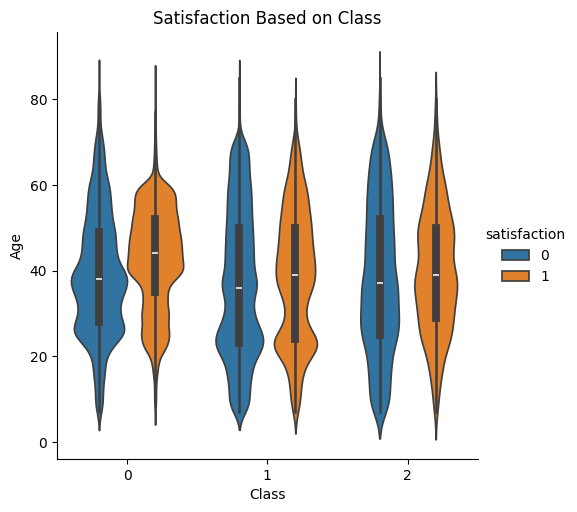

In [13]:
sns.catplot(y="Age", x="Class", hue="satisfaction",
            kind="violin", data=df).set(title ="Satisfaction Based on Class");

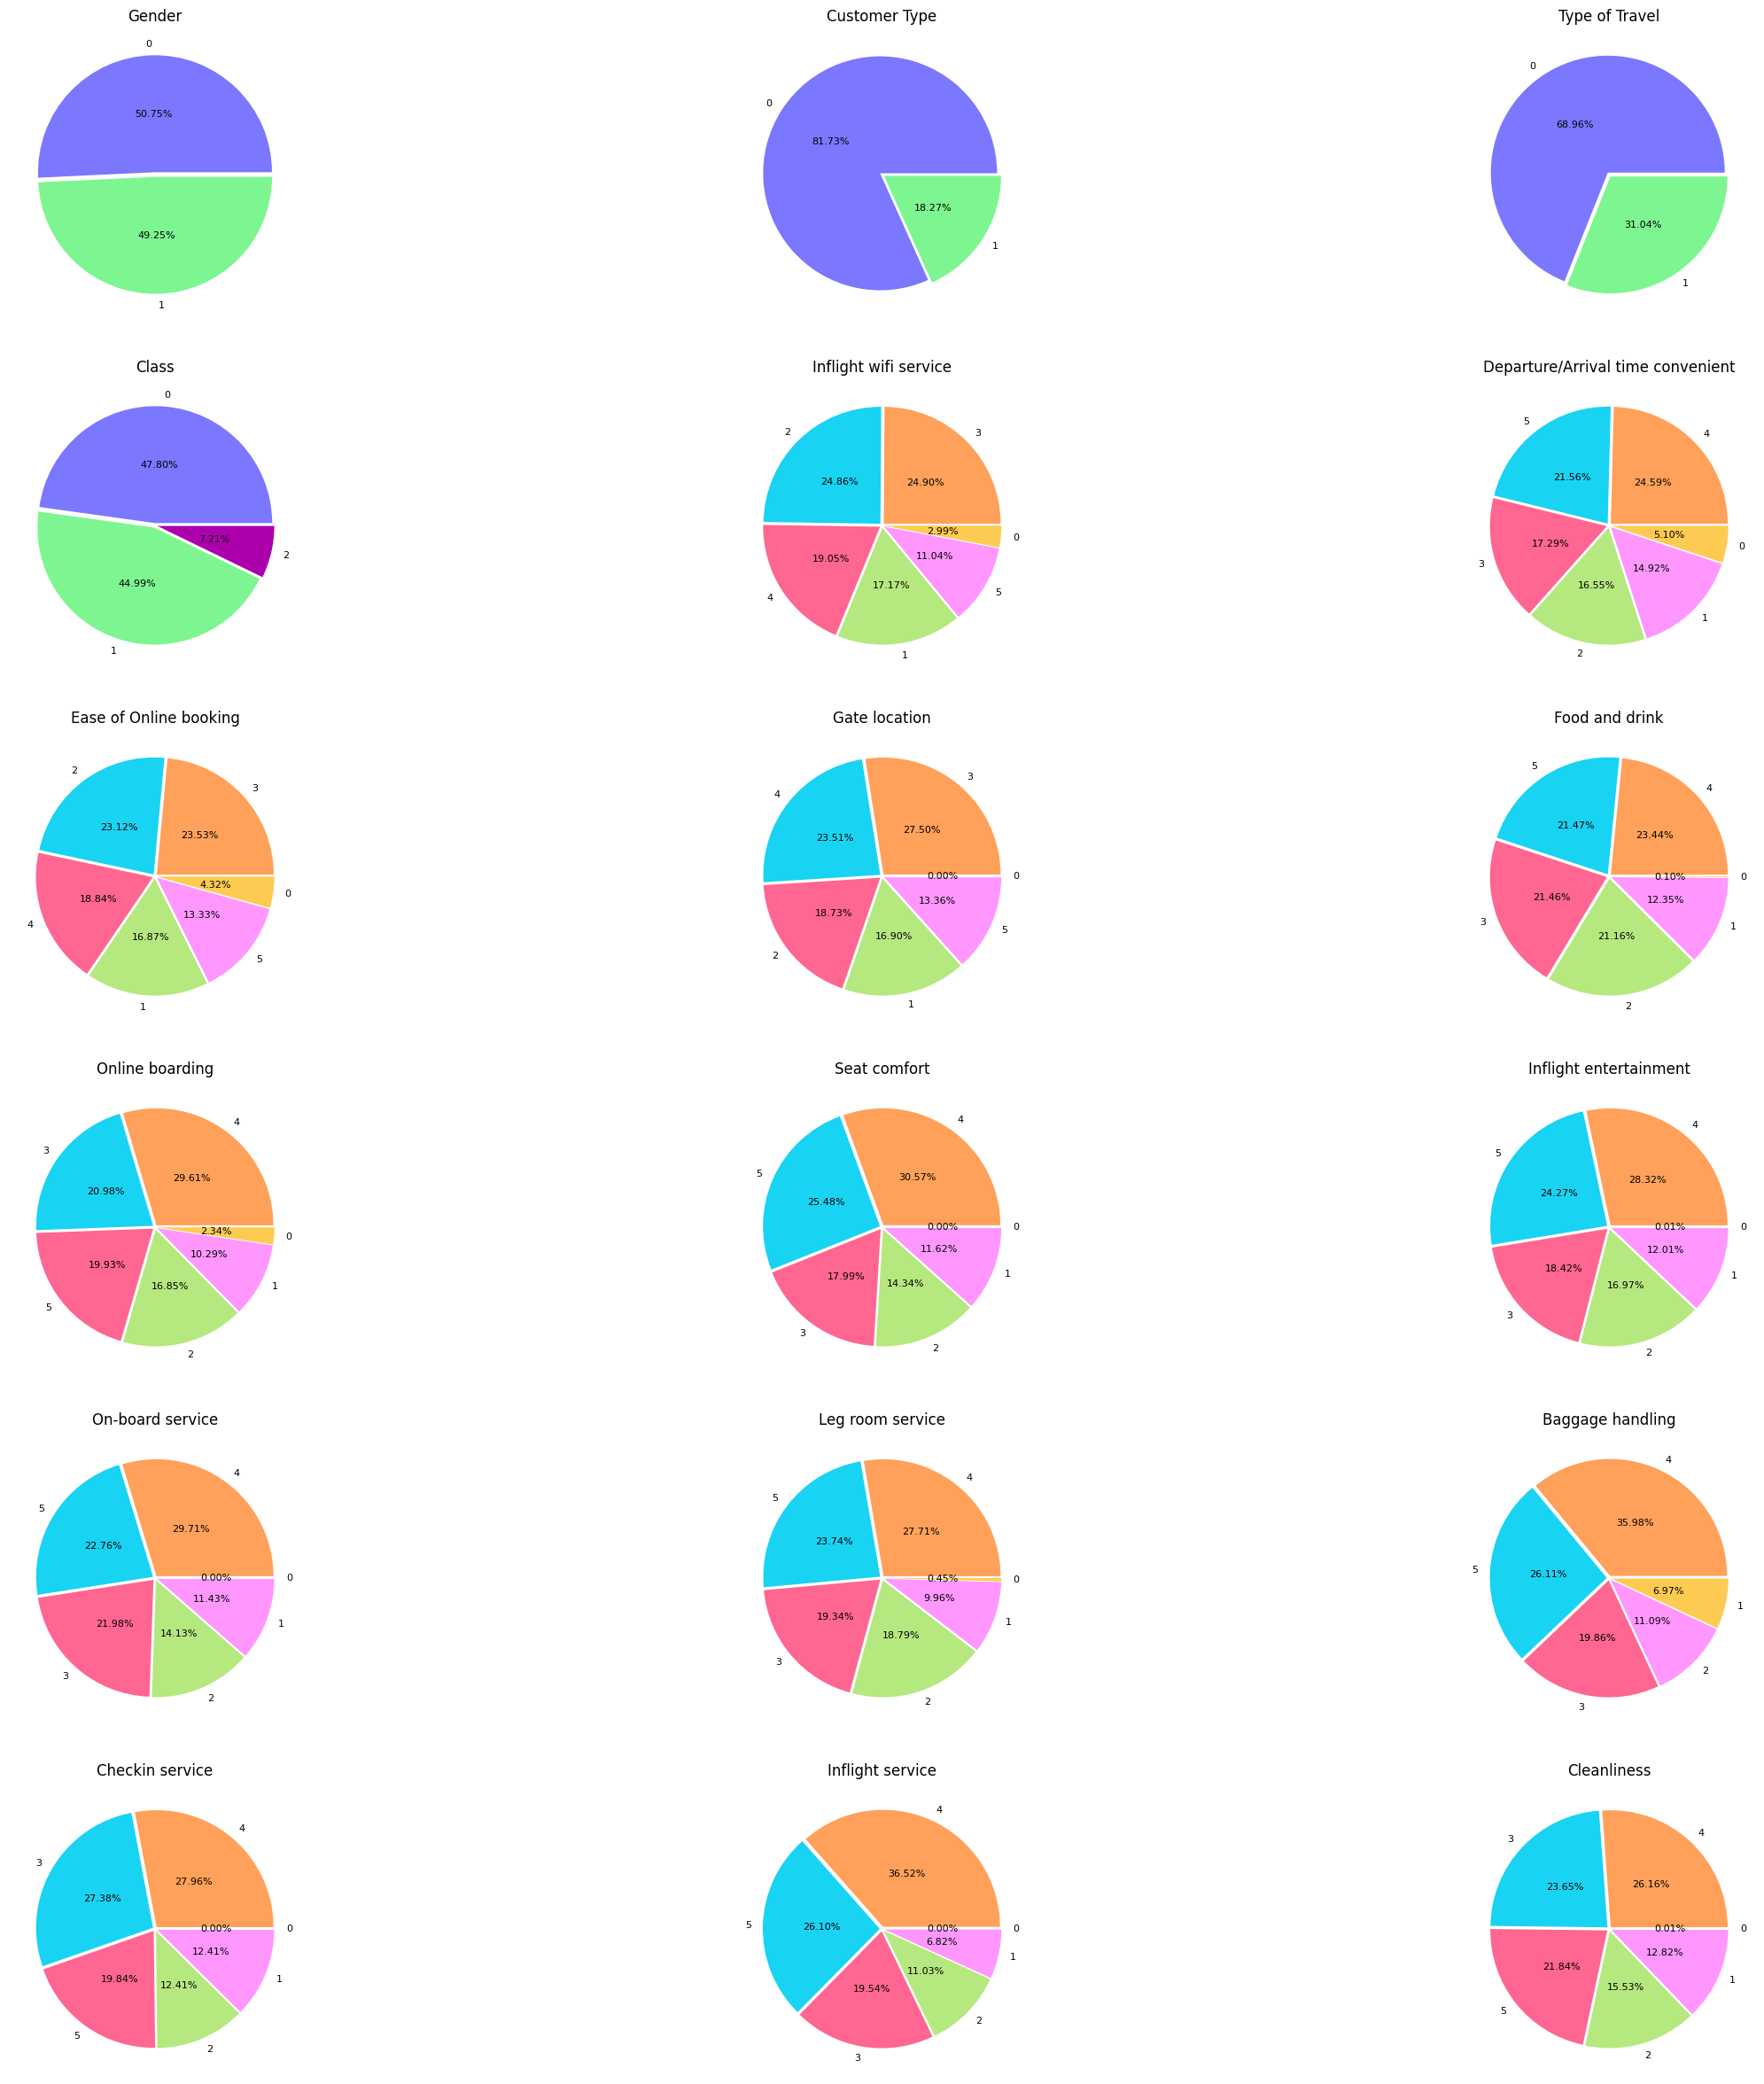

In [14]:
labels=[]
pie, ax = plt.subplots(6,3,figsize=[30,30])

for i,col in enumerate(cat_col):
    #pie, ax = plt.subplots(5,4,figsize=[15,10])
    if col=="satisfaction":
        continue;
    xc=pd.DataFrame(df[col].value_counts())


    labels = df[col].unique()
    if len(labels)==3:
        colors = ['#7b77ff', '#7df691',"#ad00ad"]
        r=[0.02]*3
    if len(labels)==2:
        colors = ['#7b77ff', '#7df691']
        r=[0.02]*2
    if len(labels)==6:
        colors = ['#FFA15A','#19D3F3','#FF6692','#B6E880','#FF97FF','#FECB52']
        r=[0.02]*6
    if len(labels)==5:
        colors = ['#FFA15A','#19D3F3','#FF6692','#FF97FF','#FECB52']
        r=[0.02]*5



    ax[i//3, i%3].pie(x = df[col].value_counts(),autopct='%.2f%%',
    explode=r, labels=xc.index, pctdistance=0.5, textprops={'fontsize': 8}, colors = colors)
    plt.title(f'{i}  distribution',)
    ax[i//3, i%3].set_title(col)

plt.show()

#### Correlation matrix for numerical Data

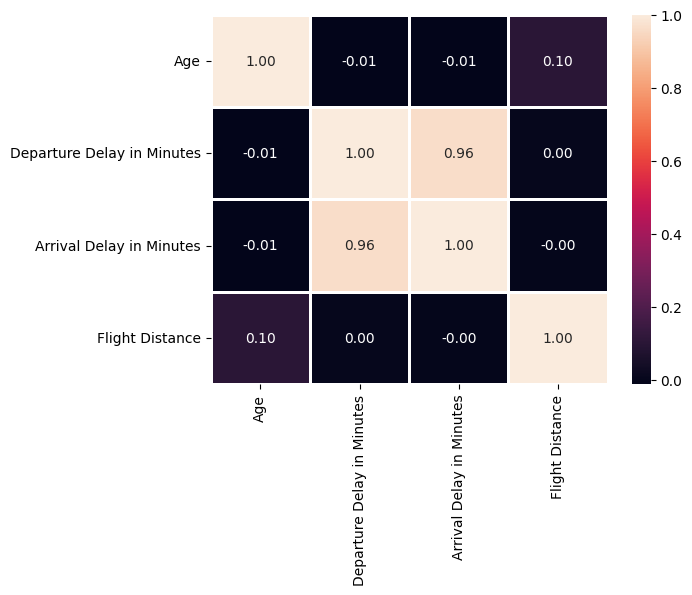

In [15]:
sns.heatmap(df[num_col].corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

#### Correlation matrix for overall data

/var/folders/5y/7zbtyz8n2t57xfy77hb3wrwm0000gn/T/ipykernel_5387/335995673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.8)


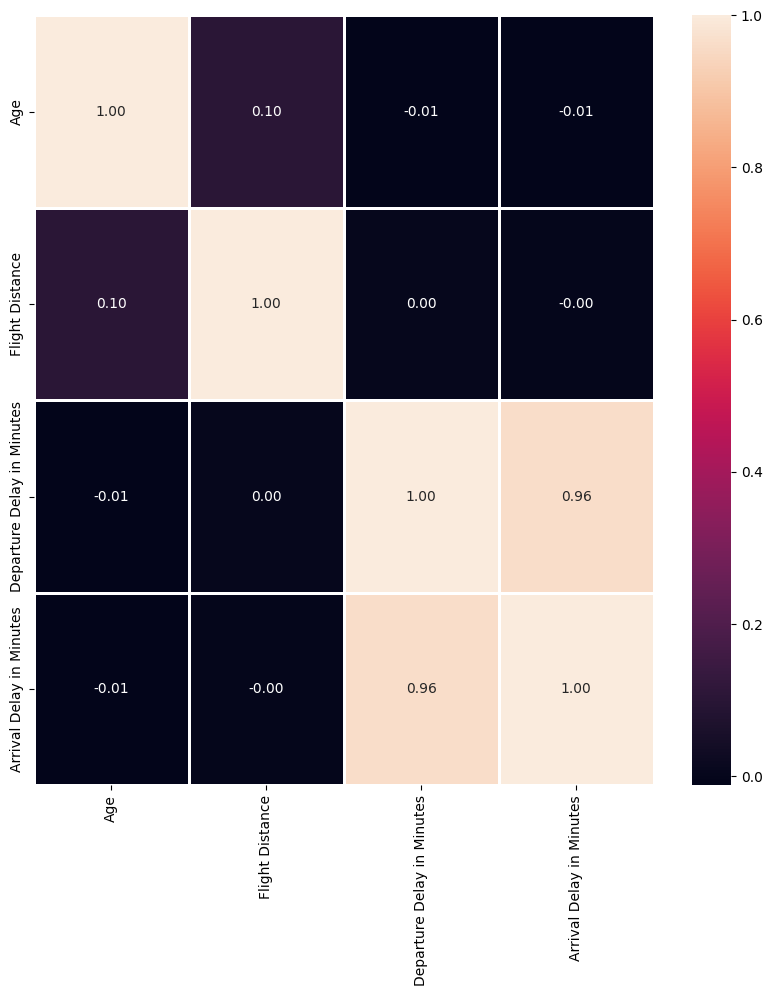

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

#### Visualize the relationship between features and satisfaction

<Figure size 1000x1000 with 0 Axes>

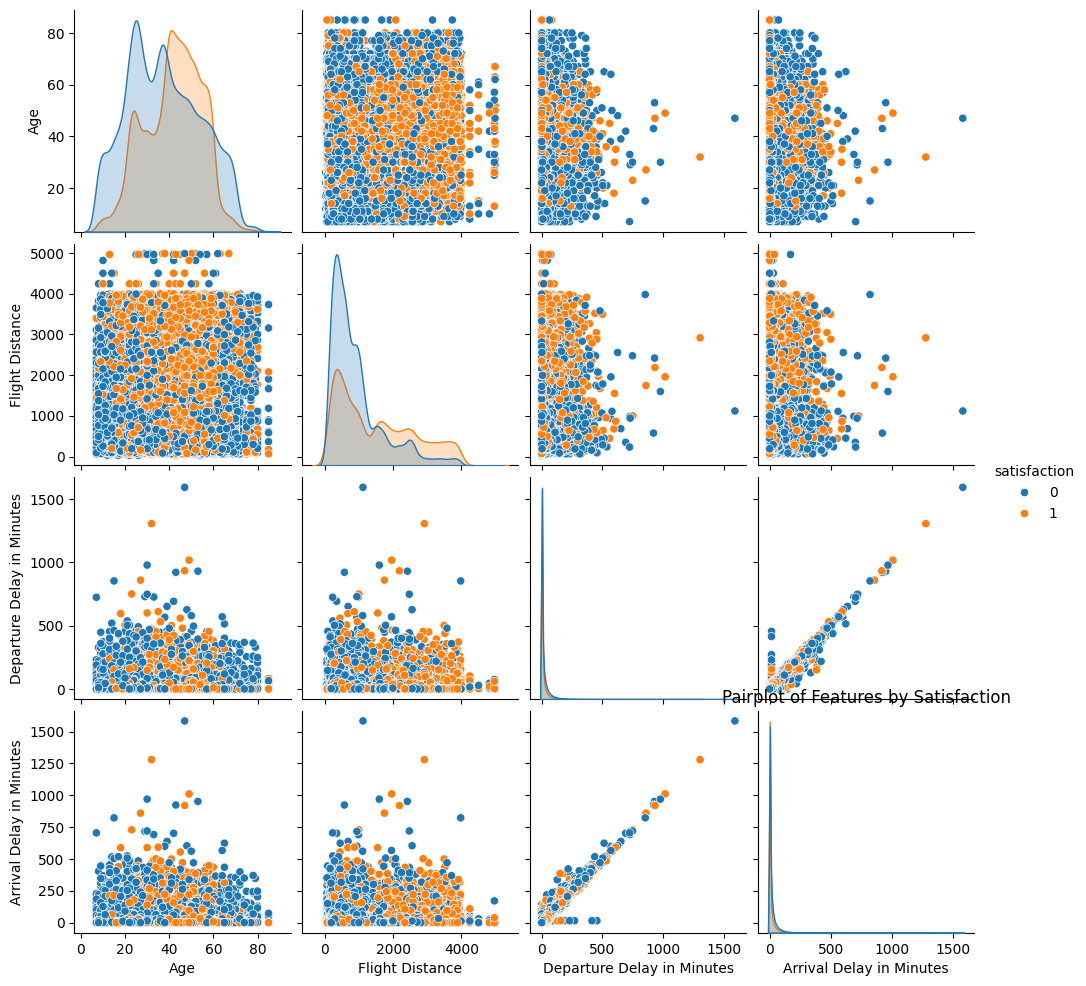

In [17]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='satisfaction')
plt.title('Pairplot of Features by Satisfaction')
plt.show()


#### Visualize the distribution of numerical features

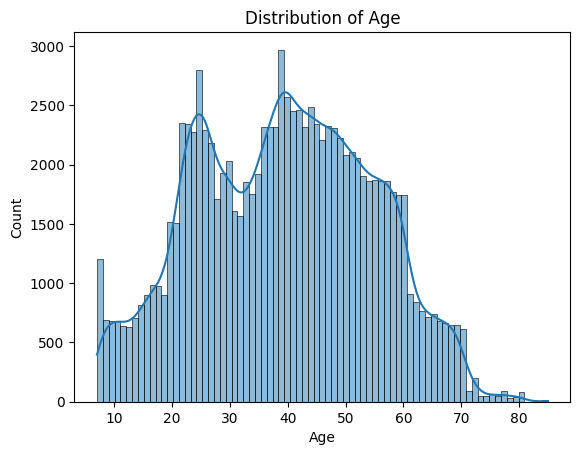

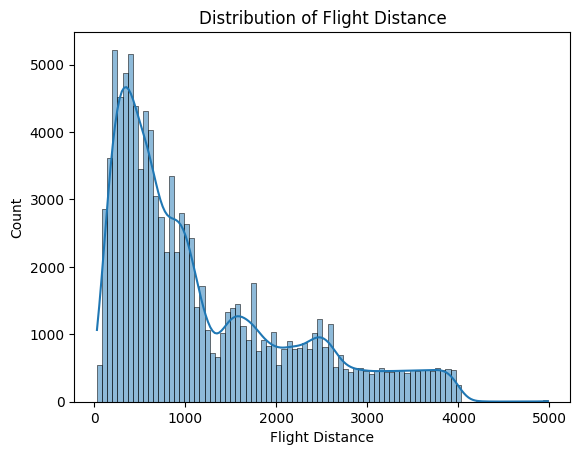

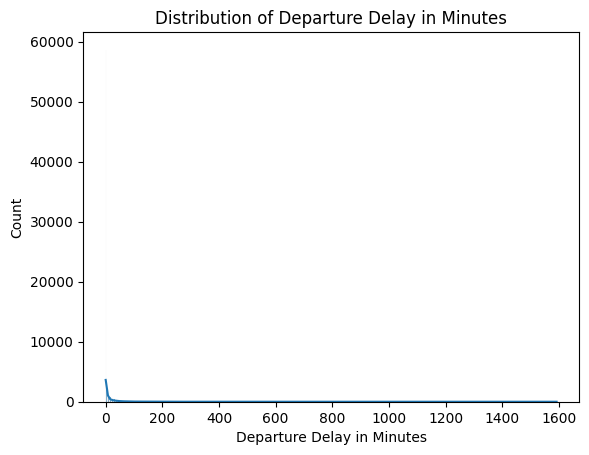

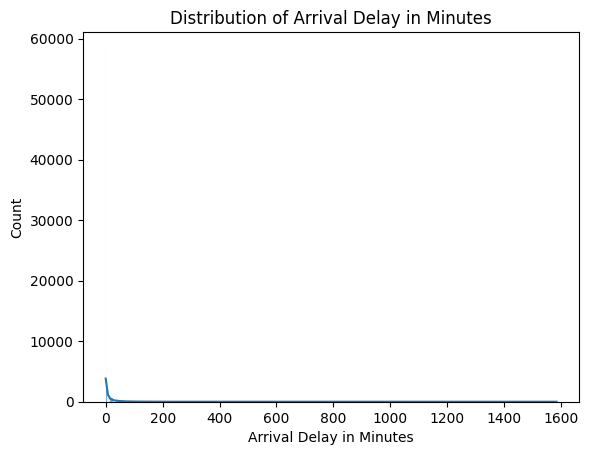

In [18]:
num_features = df.select_dtypes(include=[np.number]).columns
for feature in num_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

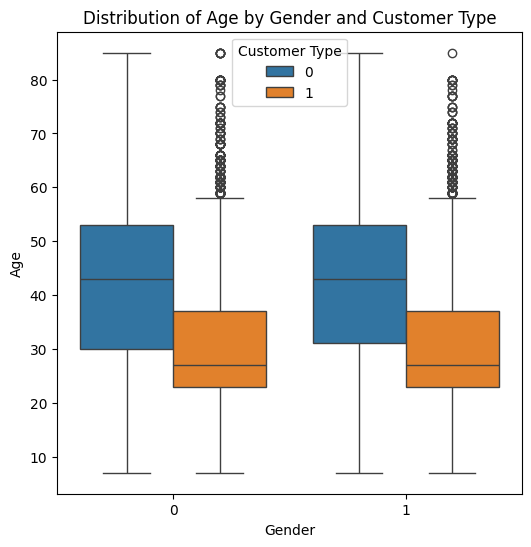

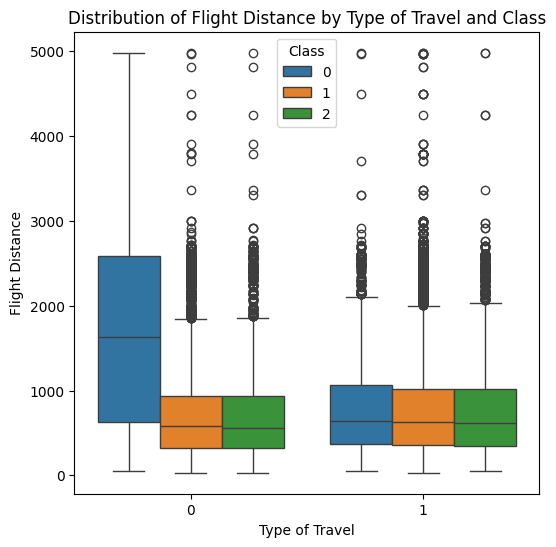

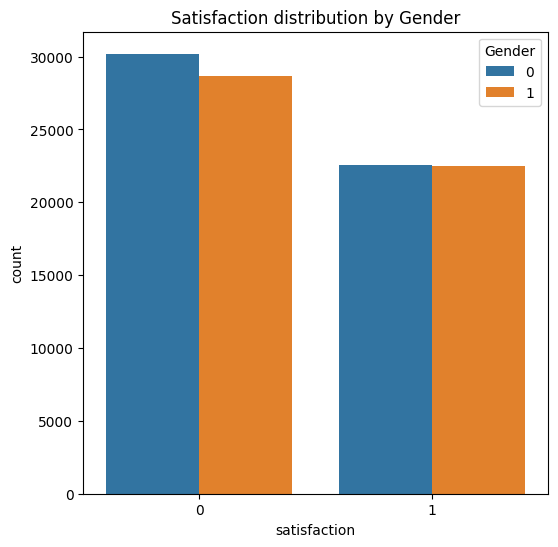

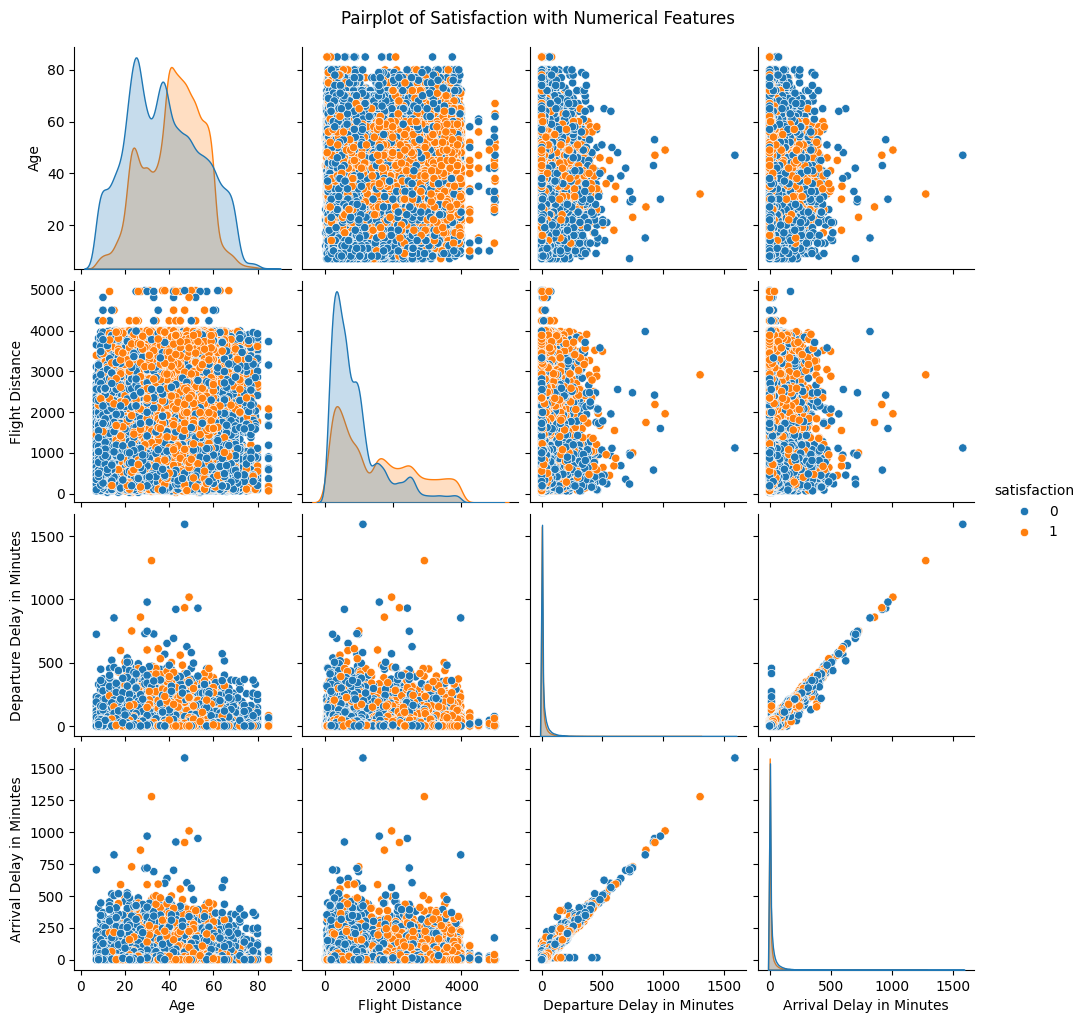

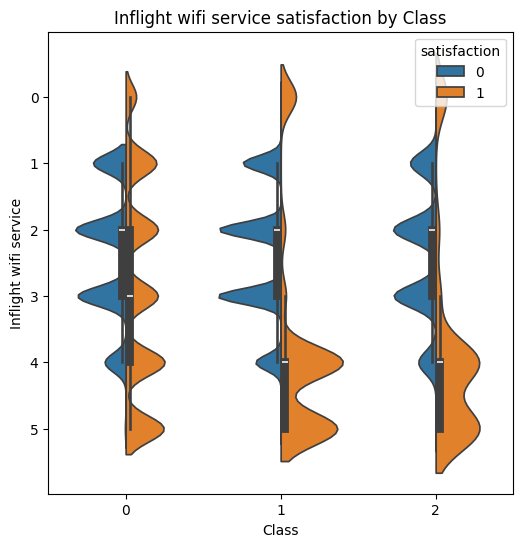

In [19]:

# Distribution of Age by Gender and Customer Type
plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Age', hue='Customer Type', data=df)
plt.title('Distribution of Age by Gender and Customer Type')
plt.show()

# Distribution of Flight Distance by Type of Travel and Class
plt.figure(figsize=(6, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df)
plt.title('Distribution of Flight Distance by Type of Travel and Class')
plt.show()

# Satisfaction distribution by Gender
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfaction', hue='Gender', data=df)
plt.title('Satisfaction distribution by Gender')
plt.show()

# Pairplot of satisfaction with numerical features
sns.pairplot(df, hue='satisfaction', vars=num_features)
plt.suptitle('Pairplot of Satisfaction with Numerical Features', y=1.02)
plt.show()

# Violin plot for Inflight wifi service satisfaction by Class
plt.figure(figsize=(6, 6))
sns.violinplot(x='Class', y='Inflight wifi service', hue='satisfaction', data=df, split=True)
plt.title('Inflight wifi service satisfaction by Class')
plt.show()


#### Distribution of Flight Distance by Type of Travel and Class

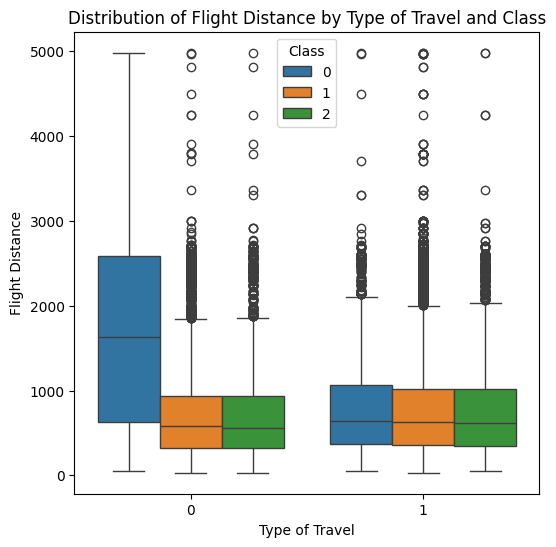

In [20]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df)
plt.title('Distribution of Flight Distance by Type of Travel and Class')
plt.show()

#### Satisfaction distribution by Gender

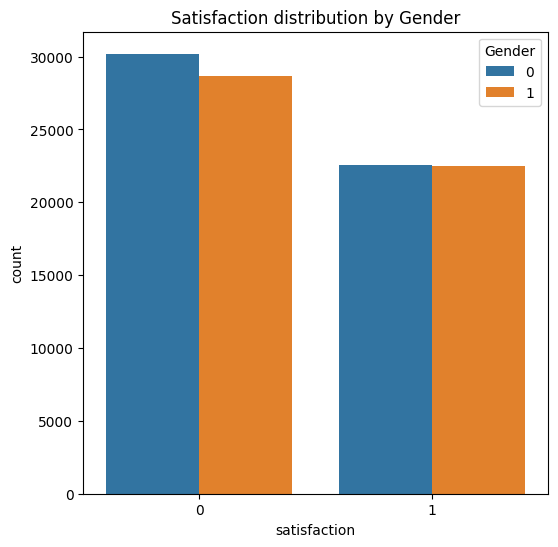

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfaction', hue='Gender', data=df)
plt.title('Satisfaction distribution by Gender')
plt.show()

#### Pairplot of satisfaction with numerical features


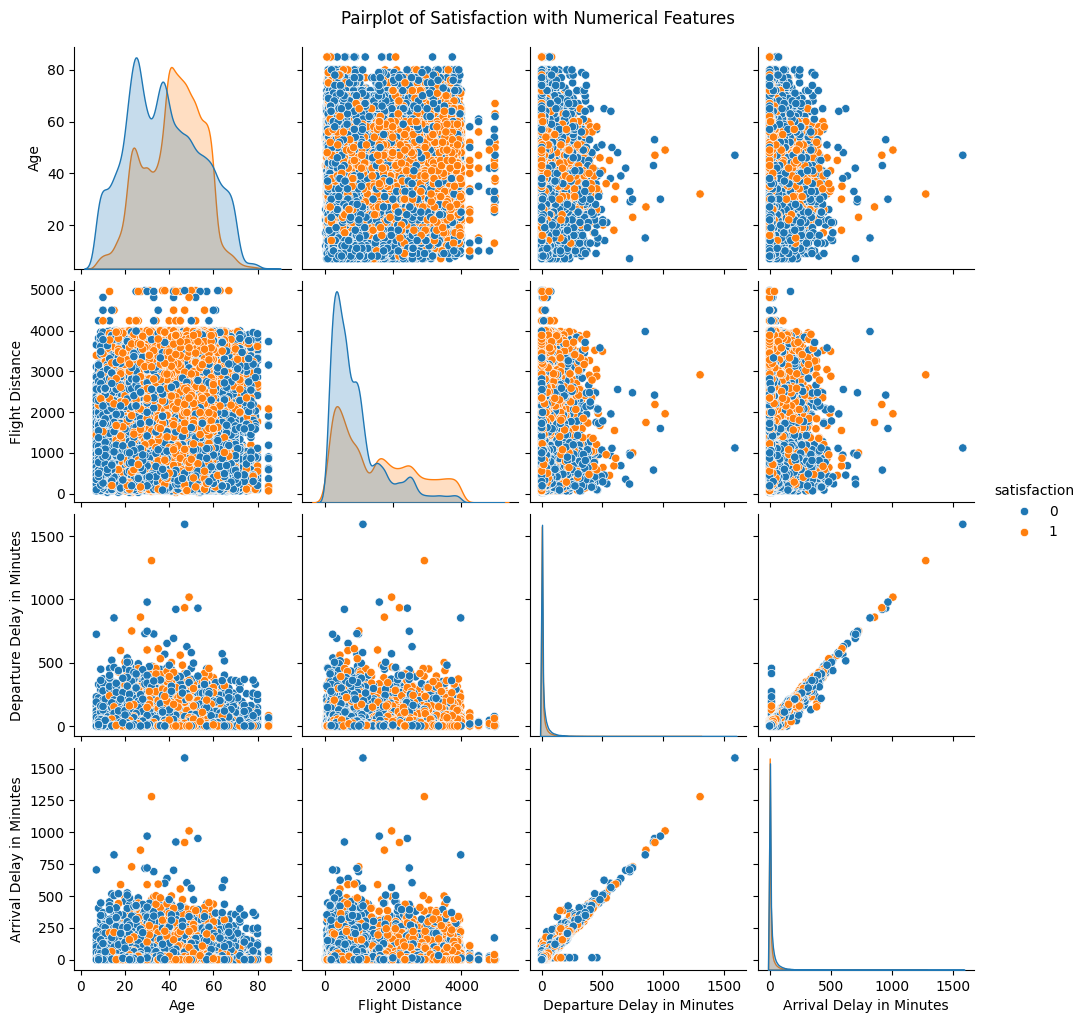

In [22]:
sns.pairplot(df, hue='satisfaction', vars=num_features)
plt.suptitle('Pairplot of Satisfaction with Numerical Features', y=1.02)
plt.show()

#### Violin plot for Inflight wifi service satisfaction by Class

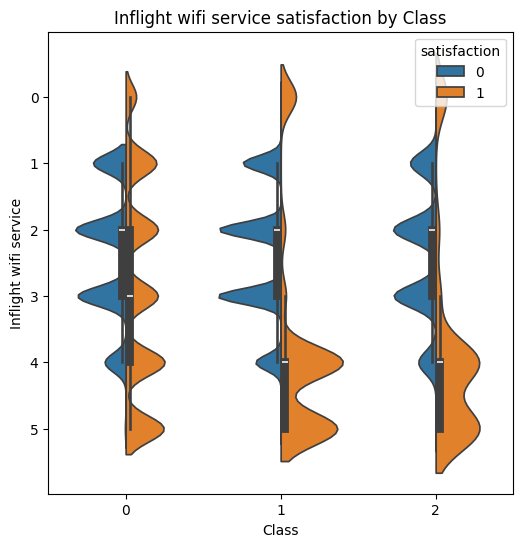

In [23]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='Class', y='Inflight wifi service', hue='satisfaction', data=df, split=True)
plt.title('Inflight wifi service satisfaction by Class')
plt.show()

### Check normality using probability plots for numerical data

Shapiro-Wilk test for Age: p-value = 0.0000


/Users/abhishekgoudar/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


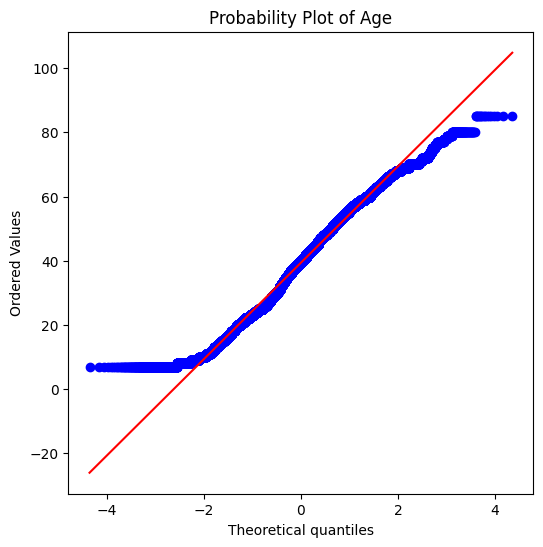

Shapiro-Wilk test for Flight Distance: p-value = 0.0000


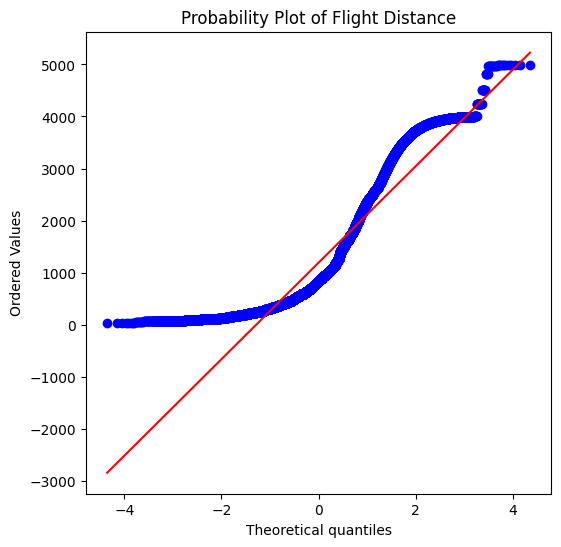

Shapiro-Wilk test for Departure Delay in Minutes: p-value = 0.0000


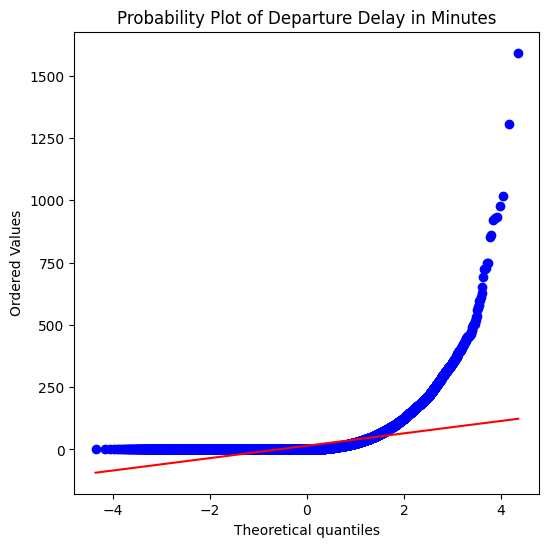

Shapiro-Wilk test for Arrival Delay in Minutes: p-value = 0.0000


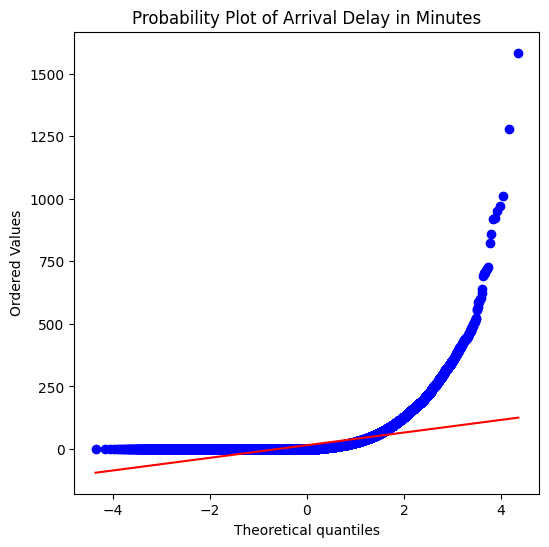

In [24]:
for feature in num_features:
    plt.figure(figsize=(6, 6))
    
    # Probability plot
    probplot(df[feature], plot=plt)
    
    plt.title(f'Probability Plot of {feature}')
    

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[feature])
    print(f'Shapiro-Wilk test for {feature}: p-value = {p_value:.4f}')
    plt.show()

# Modeling

In [ ]:
#### 

In [25]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

[[11491   222]
 [  565  8503]]


# Performance Enhancement

### Using RandomForest

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RandomForest_X_selected = X[selected_features]
RandomForest_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


### Using Correlation

In [36]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Sort features based on correlation with the target variable
target_correlation = corr_matrix['satisfaction'].abs().sort_values(ascending=False)

# Print or visualize the correlation values
print(target_correlation)

# Select top features based on correlation threshold (excluding the target variable)
selected_features = target_correlation[target_correlation.index != 'satisfaction'][target_correlation > 0.01].index.tolist()

# Subset the data with selected features
X_selected = X[selected_features]


/var/folders/5y/7zbtyz8n2t57xfy77hb3wrwm0000gn/T/ipykernel_5387/675813523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


--Return--
None
> /var/folders/5y/7zbtyz8n2t57xfy77hb3wrwm0000gn/T/ipykernel_5387/675813523.py(3)<module>()
      1 # Calculate the correlation matrix
      2 corr_matrix = df.corr()
----> 3 import pdb; pdb.set_trace()
      4 
      5 # Sort features based on correlation with the target variable

                                 Age  Flight Distance  \
Age                         1.000000         0.099461   
Flight Distance             0.099461         1.000000   
Departure Delay in Minutes -0.010152         0.002158   
Arrival Delay in Minutes   -0.012127        -0.002423   

                            Departure Delay in Minutes  \
Age                                          -0.010152   
Flight Distance                               0.002158   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.961161   

                            Arrival Delay in Minutes  
Age                                        -0.012127  
Flight Distanc

KeyError: 'satisfaction'

### Using Recurssive Elimination

In [32]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RFE_X_selected = X[selected_features]
RFE_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


In [29]:
'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding'

('Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Online boarding')

In [34]:
"Online boarding","Class","Type of Travel","Inflight entertainment","Seat comfort","On-board service","Leg room service",
"Cleanliness", "Flight Distance"         

('Cleanliness', 'Flight Distance')

In [33]:
'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Online boarding'

('Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Online boarding')

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding',"Inflight entertainment", "Seat comfort", "On-board service","Leg room service",
    "Cleanliness", "Baggage handling", "Inflight service","Checkin service", "Food and drink" ]]
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X is your feature matrix (excluding the target variable)
X = df.drop('satisfaction', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the loadings of each feature for the first principal component
loadings = pca.components_[0]

# Create a DataFrame with feature names and their loadings
feature_loadings = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort by the absolute value of loadings
feature_loadings['Loading_abs'] = feature_loadings['Loading'].abs()
feature_loadings = feature_loadings.sort_values(by='Loading_abs', ascending=False)


loadings_abs = np.abs(pca.components_)

# Average the absolute values across principal components
average_loadings = loadings_abs.mean(axis=0)

# Create a DataFrame with feature names and their average loadings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Average Loading': average_loadings})

# Sort by the average loading in descending order
feature_ranking = feature_ranking.sort_values(by='Average Loading', ascending=False)

# Display the selected features based on loadings
selected_features = feature_loadings['Feature'].tolist()
print("Selected Features after PCA:")
print(selected_features)

# Display the feature ranking
print("Feature Ranking after PCA:")
print(feature_ranking)

ValueError: could not convert string to float: 'Male'